# Assignment - Decision Trees and Random Forests

![](https://i.imgur.com/3sw1fY9.jpg)

In this assignment, you'll continue building on the previous assignment to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). 

We'll follow a step-by-step process:

1. Download and prepare the dataset for training
2. Train, evaluate and interpret a decision tree
3. Train, evaluate and interpret a random forest
4. Tune hyperparameters to improve the model
5. Make predictions and save the model

As you go through this notebook, you will find a **???** in certain places. Your job is to replace the **???** with appropriate code or values, to ensure that the notebook runs properly end-to-end and your machine learning model is trained properly without errors. 

**Guidelines**

1. Make sure to run all the code cells in order. Otherwise, you may get errors like `NameError` for undefined variables.
2. Do not change variable names, delete cells, or disturb other existing code. It may cause problems during evaluation.
3. In some cases, you may need to add some code cells or new statements before or after the line of code containing the **???**. 
4. Since you'll be using a temporary online service for code execution, save your work by running `jovian.commit` at regular intervals.
5. Review the "Evaluation Criteria" for the assignment carefully and make sure your submission meets all the criteria.
6. Questions marked **(Optional)** will not be considered for evaluation and can be skipped. They are for your learning.
7. It's okay to ask for help & discuss ideas on the [community forum](https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-2/99), but please don't post full working code, to give everyone an opportunity to solve the assignment on their own.


**Important Links**:

- Make a submission here: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests
- Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-2/99
- Review this Jupyter notebook: https://jovian.ai/aakashns/sklearn-decision-trees-random-forests


## How to Run the Code and Save Your Work

**Option 1: Running using free online resources (1-click, recommended):** The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.


**Option 2: Running on your computer locally:** To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

**Saving your work**: You can save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later and continue your work. Keep saving your work by running `jovian.commit` from time to time.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
jovian.commit(project='python-random-forests-assignment', privacy='secret')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

Let's begin by installing the required libraries.

In [4]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

In [5]:
!pip install pandas numpy matplotlib seaborn --quiet

## Download and prepare the dataset for training

In [6]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataset_url, 'house-prices.zip')
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')
    
os.listdir('house-prices')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [8]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

prices_df = pd.read_csv('house-prices/train.csv')
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = prices_df.columns[1:-1], prices_df.columns[-1]
inputs_df, targets = prices_df[input_cols].copy(), prices_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = prices_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = prices_df[input_cols].select_dtypes(include='object').columns.tolist()

# Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


Let's save our work before continuing.

In [10]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

## Decision Tree


> **QUESTION 1**: Train a decision tree regressor using the training set.

In [12]:
from sklearn.tree import DecisionTreeRegressor
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]


In [13]:
# Create the model
tree = DecisionTreeRegressor(random_state=0)

In [14]:
# Fit the model to the training data
tree.fit(X_train, train_targets)


DecisionTreeRegressor(random_state=0)

In [15]:
tree.score(X_train, train_targets)

1.0

Let's save our work before continuing.

In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

> **QUESTION 2**: Generate predictions on the training and validation sets using the trained decision tree, and compute the RMSE loss.

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
tree_train_preds = tree.predict(X_train)

In [20]:
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)

In [21]:
tree_val_preds = tree.predict(X_val) 


In [22]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)

In [23]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 37682.036335924284


Let's save our work before continuing.

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

> **QUESTION 3**: Visualize the decision tree (graphically and textually) and display feature importances as a graph. Limit the maximum depth of graphical visualization to 3 levels.

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

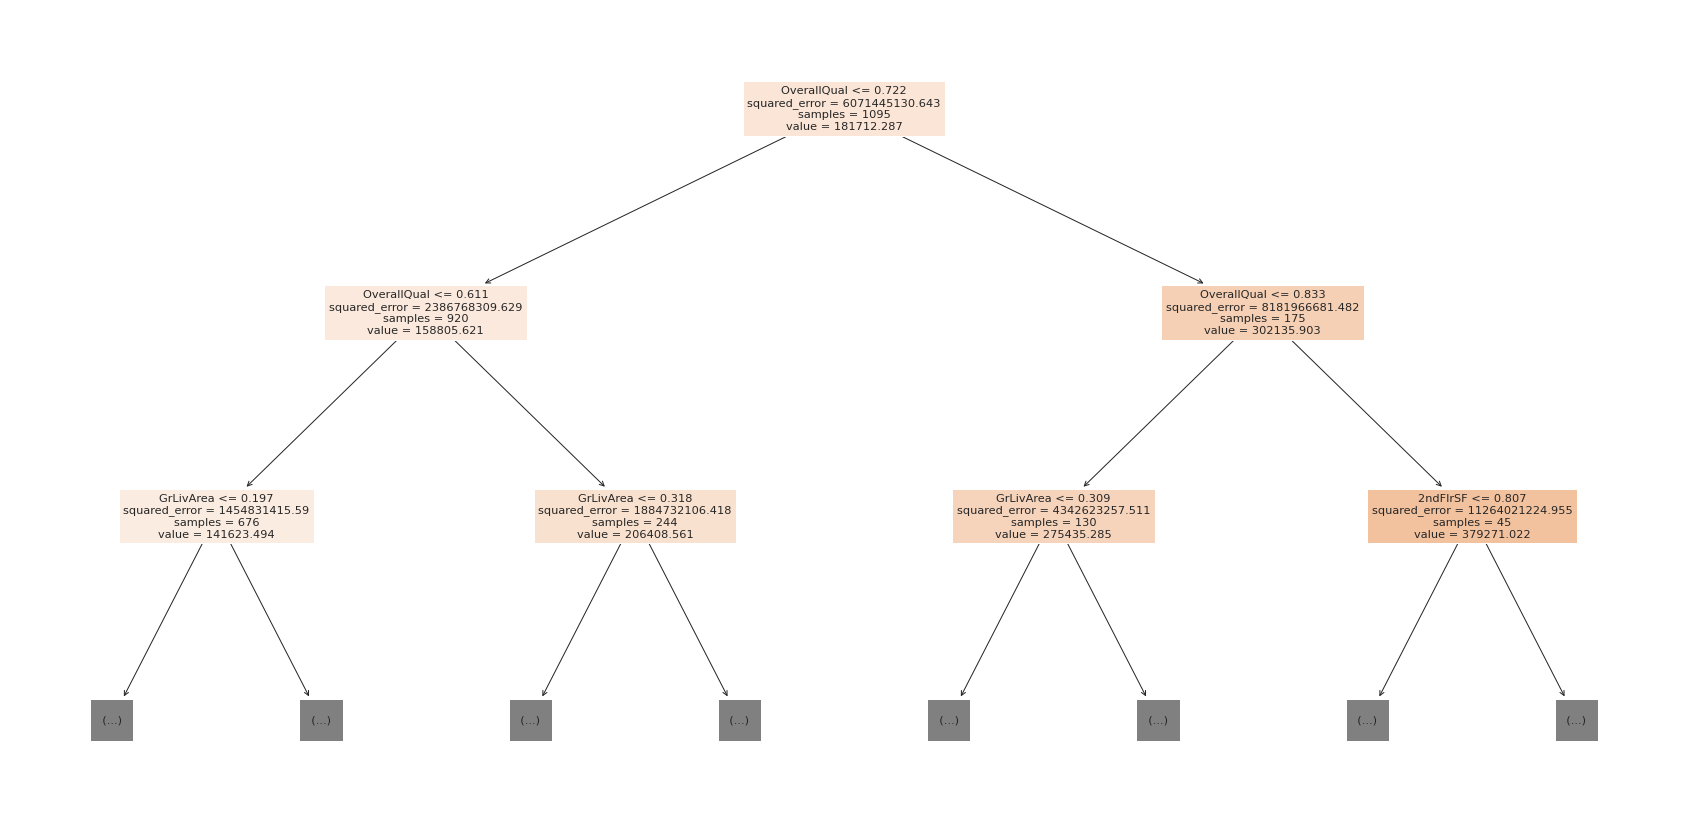

In [27]:
plt.figure(figsize=(30,15))

# Visualize the tree graphically using plot_tree
plot_tree(tree, feature_names=X_train.columns, max_depth=2, filled=True);

In [28]:
# Visualize the tree textually using export_text
tree_text = export_text(tree, max_depth=10, feature_names=list(X_train.columns))

In [29]:
# Display the first few lines
print(tree_text[:2000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- OverallQual <= 0.39
|   |   |   |   |   |--- GarageCond_TA <= 0.50
|   |   |   |   |   |   |--- LotArea <= 0.04
|   |   |   |   |   |   |   |--- CentralAir_Y <= 0.50
|   |   |   |   |   |   |   |   |--- YearBuilt <= 0.54
|   |   |   |   |   |   |   |   |   |--- Fence_GdWo <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- 1stFlrSF <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [39300.00]
|   |   |   |   |   |   |   |   |   |   |--- 1stFlrSF >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- Fence_GdWo >  0.50
|   |   |   |   |   |   |   |   |   |   |--- GrLivArea <= 0.10
|   |   |   |   |   |   |   |   |   |   |   |--- value: [34900.00]
|   |   |   |   |   |   |   |   |   |   |--- GrLivArea >  0.10
|   |   |   |   |   |   |   |   |   |   |   |--- value:

In [31]:
# Check feature importance
tree_importances = tree.feature_importances_


In [32]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [33]:
tree_importance_df

,feature,importance
3,OverallQual,0.632444
15,GrLivArea,0.107484
11,TotalBsmtSF,0.032565
13,2ndFlrSF,0.031082
12,1stFlrSF,0.026907
...,...,...
176,ExterCond_Po,0.000000
66,Neighborhood_BrDale,0.000000
65,Neighborhood_Blueste,0.000000
64,Neighborhood_Blmngtn,0.000000


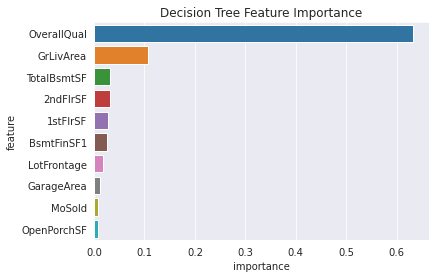

In [34]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

Let's save our work before continuing.

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

## Random Forests


> **QUESTION 4**: Train a random forest regressor using the training set.

In [36]:
from sklearn.ensemble import RandomForestRegressor
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]


In [38]:
# Create the model
rf1 = RandomForestRegressor(max_depth=2, random_state=0)

In [39]:
# Fit the model
rf1.fit(X_train, train_targets)

RandomForestRegressor(max_depth=2, random_state=0)

In [90]:
rf1.score(X_train, train_targets)


0.7030046865240506

Let's save our work before continuing.

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

> **QUESTION 5**: Make predictions using the random forest regressor.

In [43]:
rf1_train_preds = rf1.predict(X_train)

In [44]:
rf1_train_rmse =  mean_squared_error(train_targets, rf1_train_preds, squared=False)

In [45]:
rf1_val_preds = rf1.predict(X_val)

In [46]:
rf1_val_rmse =mean_squared_error(val_targets, rf1_val_preds, squared=False)

In [47]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 42463.99356899101, Validation RMSE: 44893.36956039959


Let's save our work before continuing.

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

## Hyperparameter Tuning

Let us now tune the hyperparameters of our model. You can find the hyperparameters for `RandomForestRegressor` here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Hyperparameters are use

Let's define a helper function `test_params` which can test the given value of one or more hyperparameters.

In [49]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

It can be used as follows:

In [50]:
test_params(n_estimators=20, max_depth=20)

(13776.89957127333, 28886.033523273858)

In [51]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

(20490.359632429263, 29804.931642791606)

Let's also define a helper function to test and plot different values of a single parameter.

In [52]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

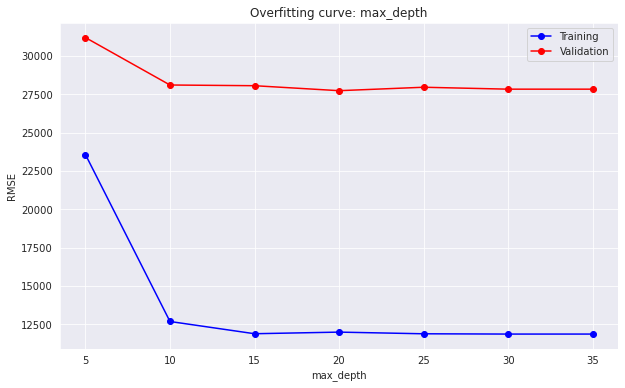

In [55]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

From the above graph, it appears that the best value for `max_depth` is around 20, beyond which the model starts to overfit.

In [60]:

s=rf1_train_rmse,rf1_val_rmse
s

(42463.99356899101, 44893.36956039959)

Let's save our work before continuing.

In [56]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

> **QUESTION 6**: Use the `test_params` and `test_param_and_plot` functions to experiment with different values of the  hyperparmeters like `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_features`, `max_leaf_nodes`, `min_impurity_decrease`, `min_impurity_split` etc. You can learn more about the hyperparameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [62]:
s

(42463.99356899101, 44893.36956039959)

In [74]:
test_params(n_estimators=40, max_depth=40)

(12363.220602471607, 27994.177463421587)

In [80]:
test_params(n_estimators=40, max_depth=40,min_samples_leaf=1, max_features=0.45)

(11761.518449079049, 27427.459694424913)

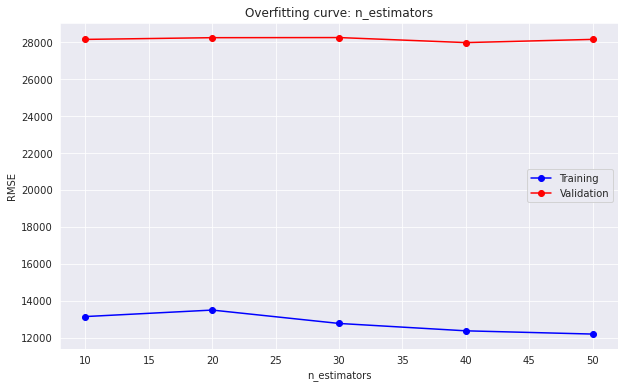

In [81]:
test_param_and_plot('n_estimators', [10,20,30,40,50])

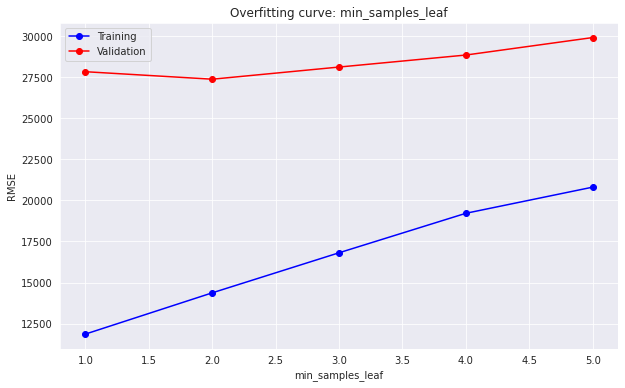

In [83]:
test_param_and_plot('min_samples_leaf', [1,2,3,4,5])

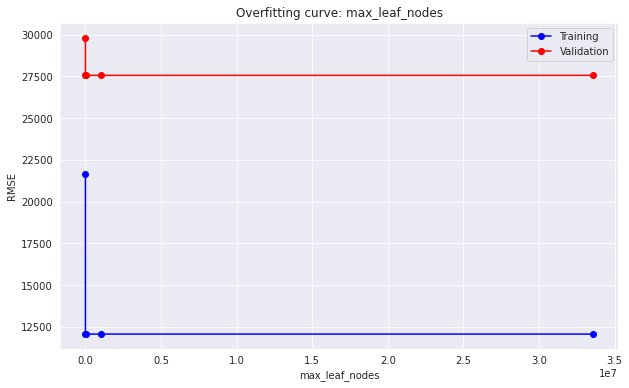

In [85]:
test_param_and_plot('max_leaf_nodes', [2**5,2**10,2**15,2**20,2**25])

Let's save our work before continuing.

In [86]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

## Training the Best Model

> **QUESTION 7**: Train a random forest regressor model with your best hyperparameters to minimize the validation loss.

In [87]:
# Create the model with custom hyperparameters
rf2 = RandomForestRegressor(n_estimators=40, max_depth=40,min_samples_leaf=1, max_features=0.45, random_state=42)

In [88]:
# Train the model
rf2.fit(X_train, train_targets)

RandomForestRegressor(max_depth=40, max_features=0.45, n_estimators=40,
                      random_state=42)

In [89]:
rf2.score(X_train, train_targets)

0.9772157512336146

Let's save our work before continuing.

In [102]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/python-random-forests-assignment


'https://jovian.ai/omkarghogale1600/python-random-forests-assignment'

> **QUESTION 8**: Make predictions and evaluate your final model. If you're unhappy with the results, modify the hyperparameters above and try again.

In [93]:
rf2_train_preds =rf2.predict(X_train)

In [94]:
rf2_train_rmse = mean_squared_error(train_targets, rf2_train_preds, squared=False)

In [95]:
rf2_val_preds = rf2.predict(X_val)

In [96]:
rf2_val_rmse = mean_squared_error(val_targets, rf2_val_preds, squared=False)

In [97]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 11761.518449079049, Validation RMSE: 27427.459694424913


Let's also view and plot the feature importances.

In [98]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [99]:
rf2_importance_df

,feature,importance
3,OverallQual,0.327962
15,GrLivArea,0.118836
172,ExterQual_TA,0.089567
25,GarageCars,0.051234
5,YearBuilt,0.046380
...,...,...
263,GarageQual_Po,0.000000
266,GarageCond_Ex,0.000000
129,RoofMatl_Roll,0.000000
269,GarageCond_Po,0.000000


<AxesSubplot:xlabel='importance', ylabel='feature'>

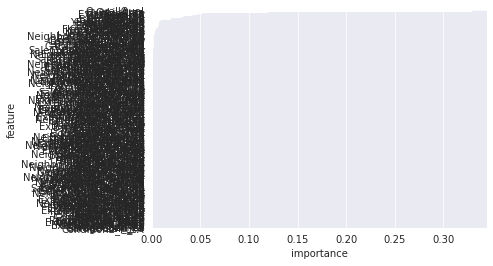

In [100]:
sns.barplot(data=rf2_importance_df, x='importance', y='feature')

Let's save our work before continuing.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Make a Submission

To make a submission, just execute the following cell:

In [ ]:
jovian.submit('zerotogbms-a2')

You can also submit your Jovian notebook link on the assignment page: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests

Make sure to review the evaluation criteria carefully. You can make any number of submissions, and only your final submission will be evalauted.

Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-2/99

NOTE: **The rest of this assignment is optional.**

## Making Predictions on the Test Set

Let's make predictions on the test set provided with the data.

In [ ]:
test_df = pd.read_csv('house-prices/test.csv')

In [ ]:
test_df

First, we need to reapply all the preprocessing steps.

In [ ]:
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

In [ ]:
test_inputs = test_df[numeric_cols + encoded_cols]

We can now make predictions using our final model.

In [ ]:
test_preds = rf2.predict(test_inputs)

In [ ]:
submission_df = pd.read_csv('house-prices/sample_submission.csv')

In [ ]:
submission_df

Let's replace the values of the `SalePrice` column with our predictions.

In [ ]:
submission_df['SalePrice'] = test_preds

Let's save it as a CSV file and download it.

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink('submission.csv') # Doesn't work on Colab, use the file browser instead to download the file.

We can now submit this file to the competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submissions

![](https://i.imgur.com/6h2vXRq.png)


> **(OPTIONAL) QUESTION**: Submit your predictions to the competition. Experiment with different models, feature engineering strategies and hyperparameters and try to reach the top 10% on the leaderboard.

Let's save our work before continuing.

In [6]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aakashns/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/aakashns/python-random-forests-assignment


'https://jovian.ai/aakashns/python-random-forests-assignment'

### Making Predictions on Single Inputs

In [ ]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    return model.predict(input_df[numeric_cols + encoded_cols])[0]

In [ ]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [ ]:
predicted_price = predict_input(rf2, sample_input)

In [ ]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

> **EXERCISE**: Change the sample input above and make predictions. Try different examples and try to figure out which columns have a big impact on the sale price. Hint: Look at the feature importance to decide which columns to try.

### Saving the Model

In [ ]:
import joblib

In [ ]:
house_prices_rf = {
    'model': rf2,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(house_prices_rf, 'house_prices_rf.joblib')

Let's save our work before continuing.

In [ ]:
jovian.commit(outputs=['house_prices_rf.joblib'])

### Predicting the Logarithm of Sale Price

> **(OPTIONAL) QUESTION**: In the [original Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation), the model is evaluated by computing the Root Mean Squared Error on the logarithm of the sale price. Try training a random forest to predict the logarithm of the sale price, instead of the actual sales price and see if the results you obtain are better than the models trained above.